In [404]:
# Import basic libraries
import numpy as np 
import pandas as pd 
# Import Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Import libraries for classification tree and data handling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [405]:
df = pd.read_csv('Bank Subscription.csv')

# ***Data Discovery***


The dataset is about a portuguese bank that has seen a steady decline in revenue. After careful observation, the leading cause for this decline was made out to be that a large number of customers are not investing in long term deposits. The bank is determined to perform campaigns with the hopes of advertising and entice existing customers to subscribe for these long term deposits.

https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification

I chose to work with this dataset from Kaggle because it is informative regarding financial institutions, with some data cleaning it can result in an efficient predictive model.


In [406]:
# some column names like contact and pdays are ambiguous names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [407]:
# Renaming ambiguious column names
df.rename(columns={'contact': 'contact_type', 'duration': 'previous_duration', 'campaign': 'current_campaign' }, inplace=True)
df.rename(columns={'pdays': 'days_passed', 'previous': 'previous_contacts', 'poutcome': 'previous_outcome' }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32950 non-null  int64 
 1   job                32950 non-null  object
 2   marital            32950 non-null  object
 3   education          32950 non-null  object
 4   default            32950 non-null  object
 5   housing            32950 non-null  object
 6   loan               32950 non-null  object
 7   contact_type       32950 non-null  object
 8   month              32950 non-null  object
 9   day_of_week        32950 non-null  object
 10  previous_duration  32950 non-null  int64 
 11  current_campaign   32950 non-null  int64 
 12  days_passed        32950 non-null  int64 
 13  previous_contacts  32950 non-null  int64 
 14  previous_outcome   32950 non-null  object
 15  y                  32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.

In [408]:
df.head().T

,0,1,2,3,4
age,49,37,78,36,59
job,blue-collar,entrepreneur,retired,admin.,retired
marital,married,married,married,married,divorced
education,basic.9y,university.degree,basic.4y,university.degree,university.degree
default,unknown,no,no,no,no
housing,no,no,no,yes,no
loan,no,no,no,no,no
contact_type,cellular,telephone,cellular,telephone,cellular
month,nov,nov,jul,may,jun
day_of_week,wed,wed,mon,mon,tue


In [409]:
# Values contain dots instead of spaces between words
df['education']

0                   basic.9y
1          university.degree
2                   basic.4y
3          university.degree
4          university.degree
                ...         
32945            high.school
32946    professional.course
32947               basic.9y
32948      university.degree
32949      university.degree
Name: education, Length: 32950, dtype: object

In [410]:
# Replacing the separating dots with an underline
df['education'] = df['education'].str.lower().str.replace('.', '_') 
df['education']

<ipython-input-410-2b45363021f9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['education'] = df['education'].str.lower().str.replace('.', '_')


0                   basic_9y
1          university_degree
2                   basic_4y
3          university_degree
4          university_degree
                ...         
32945            high_school
32946    professional_course
32947               basic_9y
32948      university_degree
32949      university_degree
Name: education, Length: 32950, dtype: object

In [411]:
# Some values contain periods at the end and others have a dash line in between.
df['job']

0         blue-collar
1        entrepreneur
2             retired
3              admin.
4             retired
             ...     
32945        services
32946      technician
32947          admin.
32948          admin.
32949          admin.
Name: job, Length: 32950, dtype: object

In [412]:
# Cleaning job values with a more appropiate format
df['job'] = df['job'].str.lower().str.replace('.', '') 
df['job'] = df['job'].str.lower().str.replace('-', '_') 
df['job']

<ipython-input-412-ba84026945ed>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['job'] = df['job'].str.lower().str.replace('.', '')


0         blue_collar
1        entrepreneur
2             retired
3               admin
4             retired
             ...     
32945        services
32946      technician
32947           admin
32948           admin
32949           admin
Name: job, Length: 32950, dtype: object

In [413]:
# No missing values found
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact_type         0
month                0
day_of_week          0
previous_duration    0
current_campaign     0
days_passed          0
previous_contacts    0
previous_outcome     0
y                    0
dtype: int64

In [414]:
# Identifying unique values for categorical predictors
for i in np.arange(df.shape[1]):
    if (i > 0 and i < 10) or i >= 14:
        print(i,': \n' + str(sorted(df.iloc[:,i].unique())))

1 : 
['admin', 'blue_collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self_employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
2 : 
['divorced', 'married', 'single', 'unknown']
3 : 
['basic_4y', 'basic_6y', 'basic_9y', 'high_school', 'illiterate', 'professional_course', 'university_degree', 'unknown']
4 : 
['no', 'unknown', 'yes']
5 : 
['no', 'unknown', 'yes']
6 : 
['no', 'unknown', 'yes']
7 : 
['cellular', 'telephone']
8 : 
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
9 : 
['fri', 'mon', 'thu', 'tue', 'wed']
14 : 
['failure', 'nonexistent', 'success']
15 : 
['no', 'yes']


In [415]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.014112,10.403636,17.0,32.0,38.0,47.0,98.0
previous_duration,32950.0,258.127466,258.975917,0.0,103.0,180.0,319.0,4918.0
current_campaign,32950.0,2.560607,2.752326,1.0,1.0,2.0,3.0,56.0
days_passed,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous_contacts,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0




*   The average age for the customers seems to be in the late 30s to early 40s, we have customers as young as 17 and senior citizens in the 90s range.
*   The average duration for each advertisement is 258 seconds or 4 minutes.
*   The mean waiting period is 2 years before a customer is contacted again based on the days passed predictor.
*   However, Some customers might be contacted more than 50 times during the current campaign.






<ipython-input-416-a918a5666cdf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)


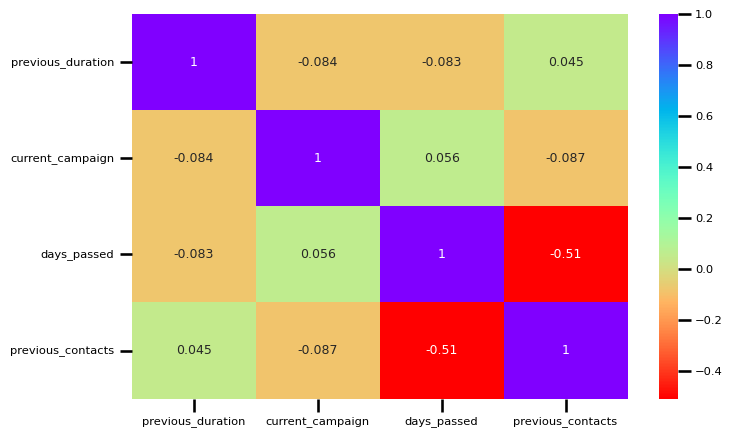

In [416]:
plt.figure(figsize = (8,5))
sns.set_context("talk", font_scale=0.5)
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)
plt.show()

There is a high negative correlation between the number of days passed since a customer was last contacted and the total number of times a customer has been contacted in the past. In other words, the more a customer is contacted the more frequent the calls become in the current campaign. The relationship occurs because less number of days pass between each contact.

# ***Exploratory Data Analysis***

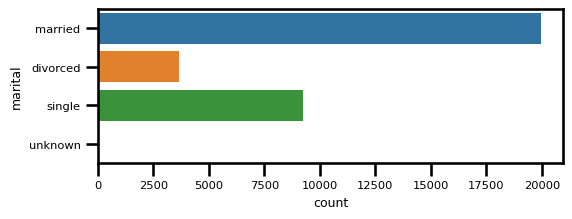

In [417]:
# Marital status distribution
plt.figure(figsize = (6, 2))
sns.countplot(y='marital', data=df)
plt.show()

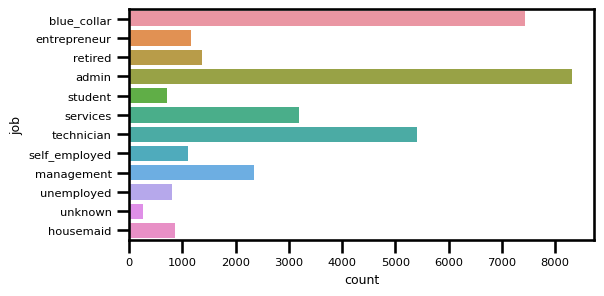

In [418]:
# Employment distribution of customers
plt.figure(figsize = (6, 3))
sns.countplot(y='job', data=df)
plt.show()

Determining default distributions

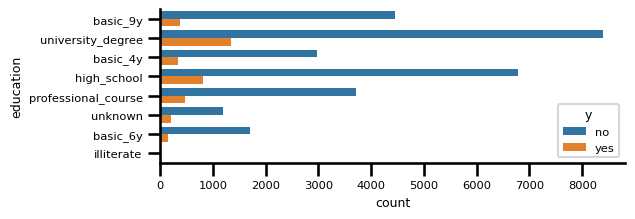

In [419]:
# Campaign success based on education status
plt.figure(figsize = (6, 2))
sns.countplot(y='education', data=df,hue = 'y')
sns.despine()
plt.show()

Campaign success has been more frequent with customers possessing a university degree so they were more likely to sign up for a long term deposit.

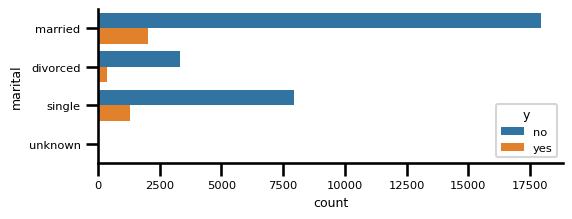

In [420]:
# Campaign success based on marital status
plt.figure(figsize = (6, 2))
sns.countplot(y='marital', data=df,hue = 'y')
sns.despine()
plt.show()

Married customers are more likely to subscribe than divorced or single.

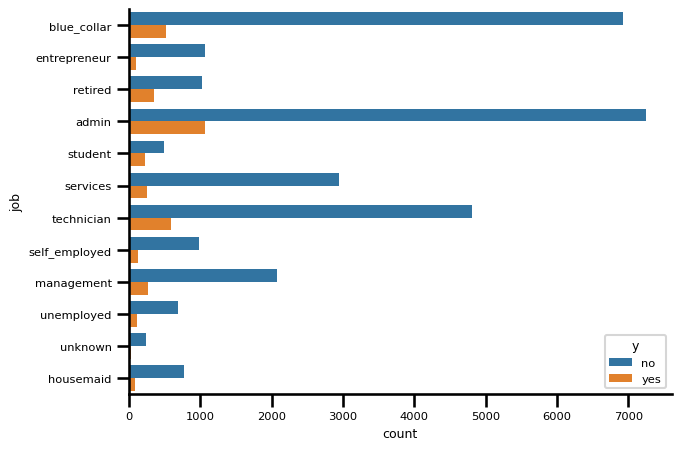

In [421]:
# Campaign succes based on customer employement 
plt.figure(figsize = (7, 5))
sns.countplot(y='job', data=df,hue = 'y')
sns.despine()
plt.show()

This one is more evenly distributed, the top 3 customers subscribed tend to be employed as an administrator, technician or other blue collar jobs.

# ***Classification Tree Model Performance***

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32950 non-null  int64 
 1   job                32950 non-null  object
 2   marital            32950 non-null  object
 3   education          32950 non-null  object
 4   default            32950 non-null  object
 5   housing            32950 non-null  object
 6   loan               32950 non-null  object
 7   contact_type       32950 non-null  object
 8   month              32950 non-null  object
 9   day_of_week        32950 non-null  object
 10  previous_duration  32950 non-null  int64 
 11  current_campaign   32950 non-null  int64 
 12  days_passed        32950 non-null  int64 
 13  previous_contacts  32950 non-null  int64 
 14  previous_outcome   32950 non-null  object
 15  y                  32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.

In [423]:
# Deleting irrelevant categorical columns
df = df.iloc[:,np.r_[0:7, 10:16]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32950 non-null  int64 
 1   job                32950 non-null  object
 2   marital            32950 non-null  object
 3   education          32950 non-null  object
 4   default            32950 non-null  object
 5   housing            32950 non-null  object
 6   loan               32950 non-null  object
 7   previous_duration  32950 non-null  int64 
 8   current_campaign   32950 non-null  int64 
 9   days_passed        32950 non-null  int64 
 10  previous_contacts  32950 non-null  int64 
 11  previous_outcome   32950 non-null  object
 12  y                  32950 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


In [424]:
# Dummy encoding the categorical variables 
df_dummies= pd.get_dummies(df,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'previous_outcome'], drop_first=False)


In [425]:
# storing dependent variable values in a new variable y and dropping it from the dataframe
y = df_dummies['y']
df_dummies.drop('y', inplace = True, axis = 1)

In [426]:
# splitting the data 80/20
X_train, X_test, y_train, y_test= train_test_split (df_dummies, y, test_size=0.2, random_state=1)

In [427]:
# obtaining the paths to a full grown tree
tree_bank_unprunned= DecisionTreeClassifier(criterion='gini', random_state=1)
path= tree_bank_unprunned.cost_complexity_pruning_path(X_train, y_train)

In [428]:
# obtaining the best accuracy based on CCP 
# Warning high runtime
alphas= path['ccp_alphas']
accuracy_scores=[]
for i in alphas:
    treeloop= DecisionTreeClassifier(ccp_alpha=i, random_state=1)
    treeloop.fit(X_train, y_train)
    y_test_predicted=treeloop.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_test_predicted)) 

In [429]:
# Best tree obtained based on the alpha index
indexmax=accuracy_scores.index(max(accuracy_scores))
tree_bank_postprunned= DecisionTreeClassifier(ccp_alpha= alphas[indexmax], random_state=1)
tree_bank_postprunned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0010846479911081133, random_state=1)

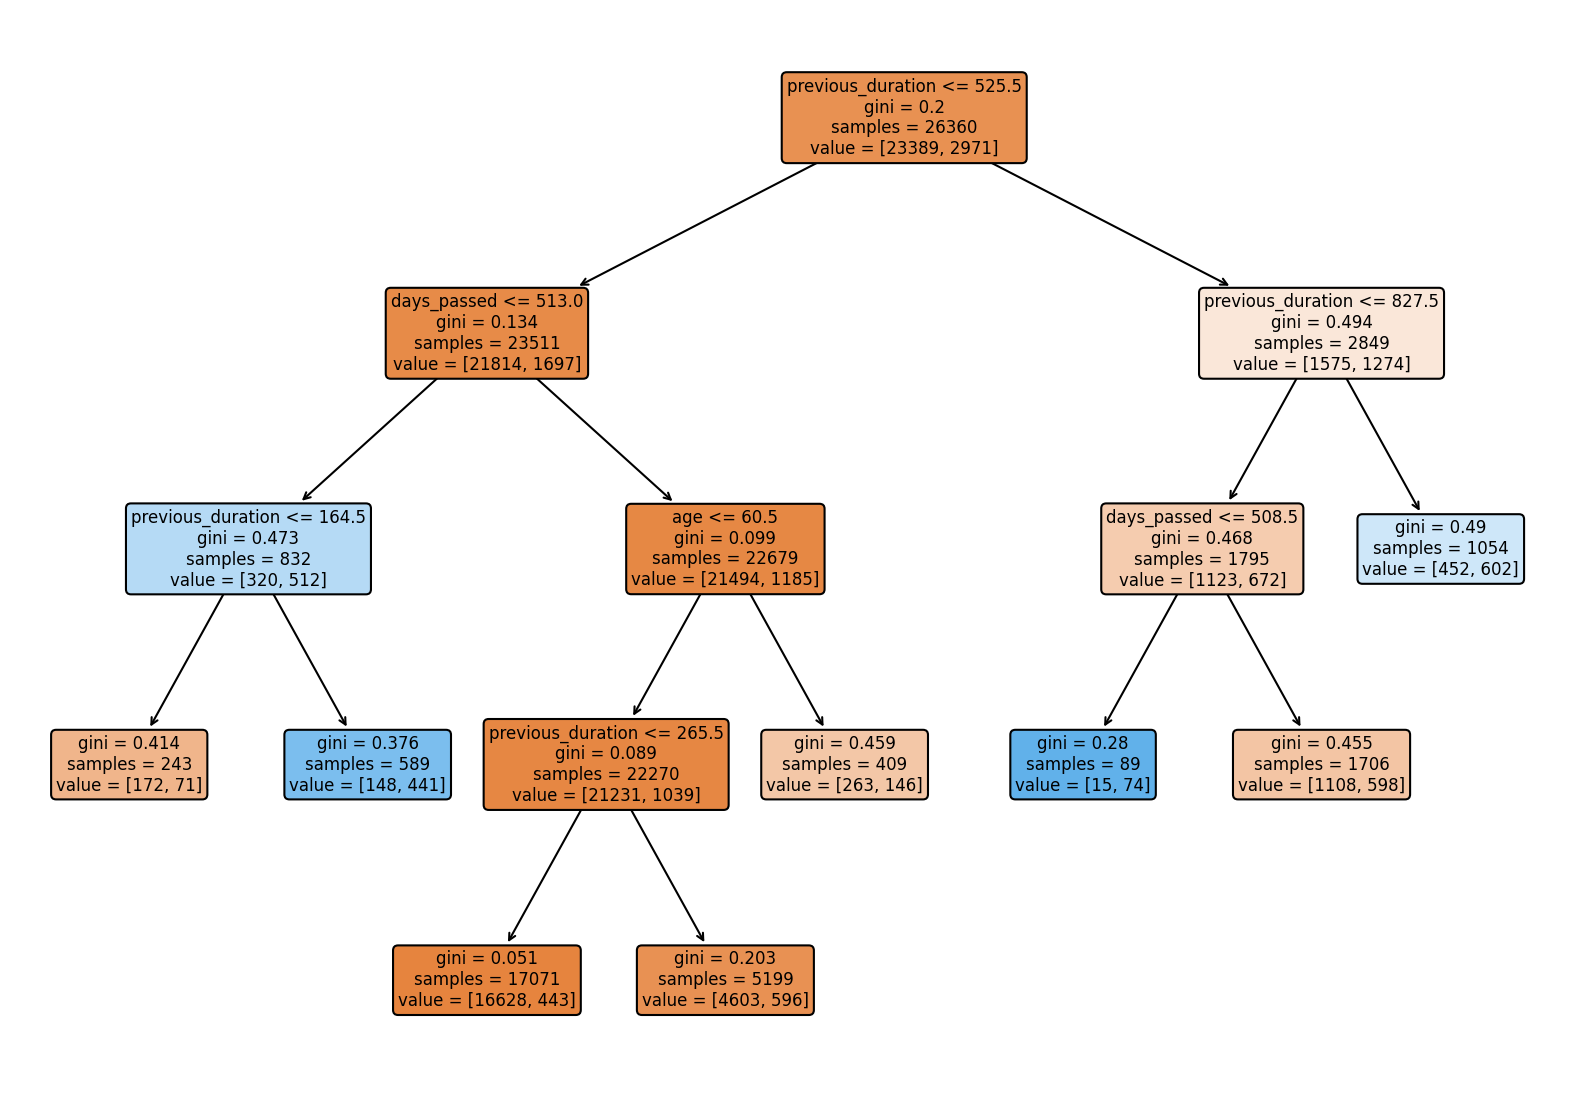

In [430]:
plt.figure(figsize=(20,14))   
tree.plot_tree(tree_bank_postprunned,filled=True, rounded= True, feature_names=X_train.columns, fontsize=12)
plt.show()

In [431]:
# Evaluation performance
bank_postprunned_predicted_test= tree_bank_postprunned.predict(X_test)
print (classification_report (y_test, bank_postprunned_predicted_test))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      5849
         yes       0.67      0.37      0.48       741

    accuracy                           0.91      6590
   macro avg       0.80      0.68      0.72      6590
weighted avg       0.90      0.91      0.90      6590



It turns out that the most important predictors are the highly negative correlated ones between days past since last advertisement and total number of calls done in the past. It is better to conduct another model without these two predictors creating bias.

# ***Removing highly correlated predictor and trying a new model.***

In [447]:
# Creating a new dataframe without the highly correlated columns previous duration and days passed
y = df['y']
df_cut  = df.drop(['y', 'days_passed', 'previous_duration', 'previous_contacts', 'marital', 'housing'], axis = 1)


In [448]:
# new dummy variables with updated data frame
df_dummies= pd.get_dummies(df_cut,columns=['job', 'education', 'default','loan', 'previous_outcome'], drop_first=False)

In [449]:
# splitting the data 80/20
X_train, X_test, y_train, y_test= train_test_split (df_dummies, y, test_size=0.2, random_state=1)

In [450]:
# obtaining the paths to a full grown tree
tree_bank_unprunned= DecisionTreeClassifier(criterion='gini', random_state=1)
path= tree_bank_unprunned.cost_complexity_pruning_path(X_train, y_train)

In [451]:
# obtaining the best accuracy based on CCP 
# Warning high runtime
alphas= path['ccp_alphas']
accuracy_scores=[]
for i in alphas:
    treeloop= DecisionTreeClassifier(ccp_alpha=i, random_state=1)
    treeloop.fit(X_train, y_train)
    y_test_predicted=treeloop.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_test_predicted)) 

In [452]:
# Best tree obtained based on the alpha index
indexmax=accuracy_scores.index(max(accuracy_scores))
tree_bank_postprunned= DecisionTreeClassifier(ccp_alpha= alphas[indexmax], random_state=1)
tree_bank_postprunned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001496511834144596, random_state=1)

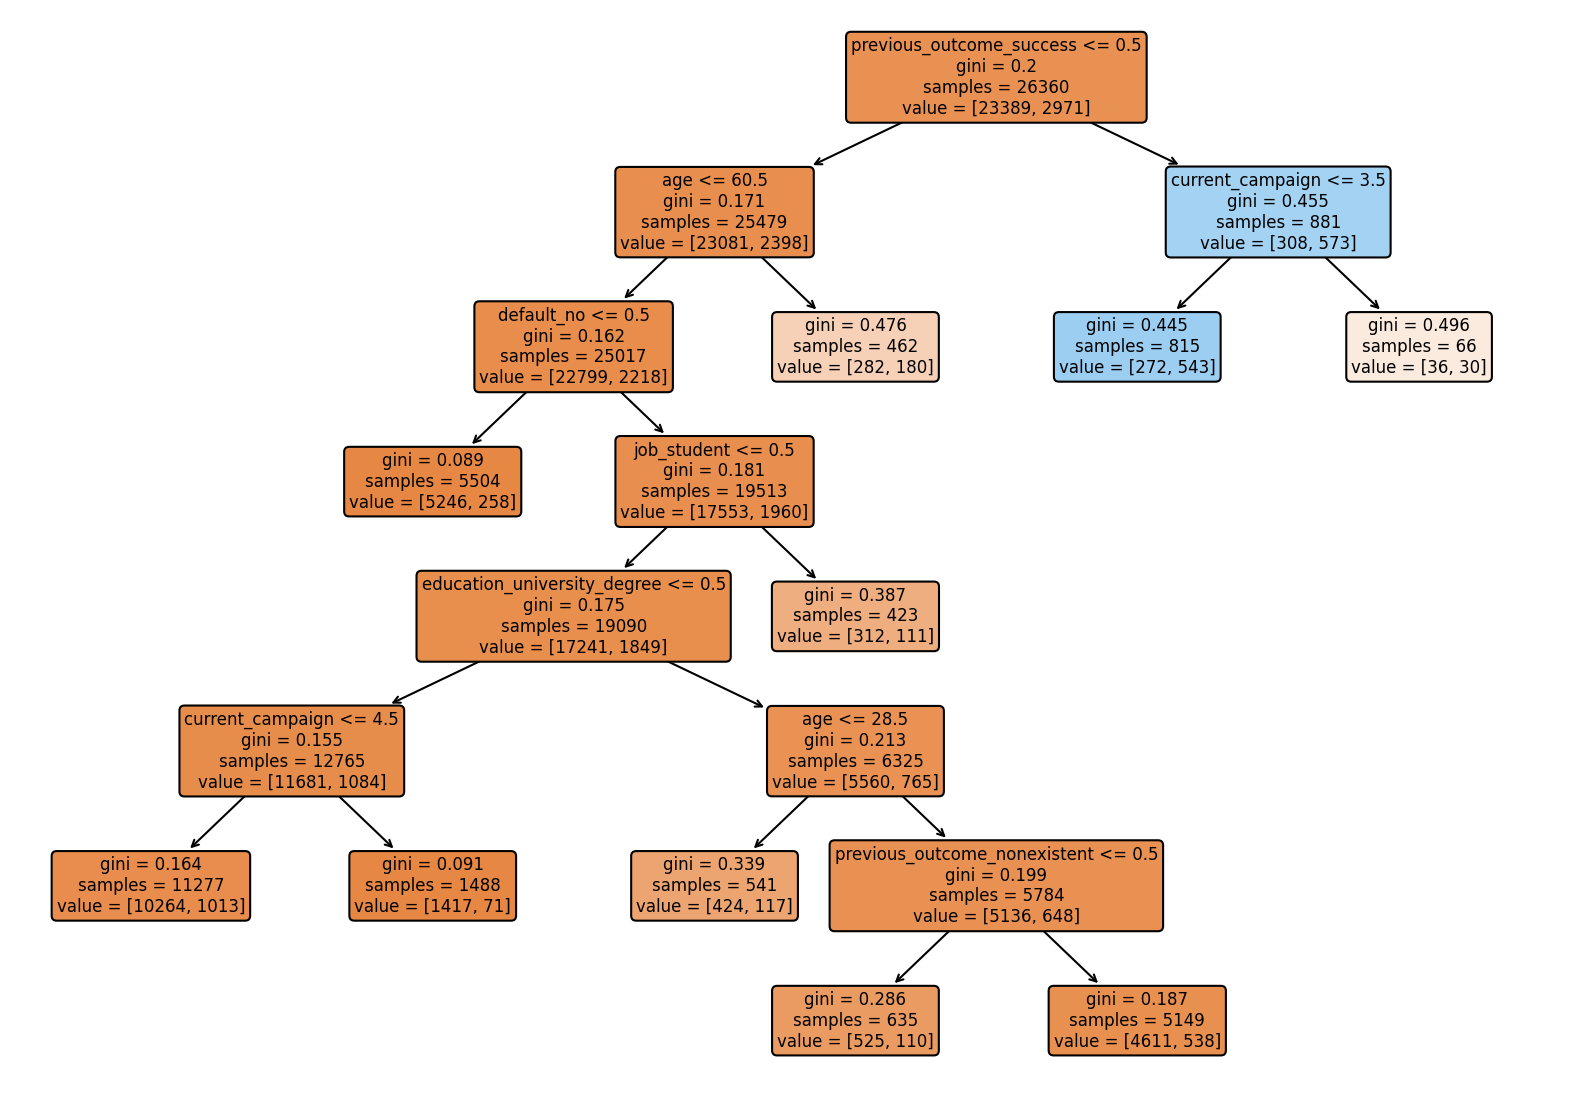

In [453]:
plt.figure(figsize=(20,14))   
tree.plot_tree(tree_bank_postprunned,filled=True, rounded= True, feature_names=X_train.columns, fontsize=12)
plt.show()

In [454]:
# Evaluation performance
bank_postprunned_predicted_test= tree_bank_postprunned.predict(X_test)
print (classification_report (y_test, bank_postprunned_predicted_test))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      5849
         yes       0.65      0.18      0.29       741

    accuracy                           0.90      6590
   macro avg       0.78      0.59      0.62      6590
weighted avg       0.88      0.90      0.87      6590



 In conclusion, even though the decision has high precision, the recall for the yes class is too low so there would be many customers that might be looking to subscribe but the model will confuse them for an unsubscribing customer. Overall the classification tree using ccp failed to give us a good enough model.